In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('../bracket_outputs/brackets.csv')
df.head()

flangeX  flangeY  thickness  holeRadius  holeOffset  bboxX  bboxY  bboxZ  \
0       50       60         10           3           8   50.0   70.0   10.0   
1       50       60         10           3          10   50.0   70.0   10.0   
2       50       60         10           3          12   50.0   70.0   10.0   
3       50       80         10           3           8   50.0   90.0   10.0   
4       50       80         10           3          10   50.0   90.0   10.0   

   volumeEstimate     mass  sliceCount  
0         35000.0  36400.0          15  
1         35000.0  36400.0          15  
2         35000.0  36400.0          15  
3         45000.0  46800.0          15  
4         45000.0  46800.0          15

In [3]:
# Quick summary
df.describe()

flangeX     flangeY  thickness  holeRadius  holeOffset      bboxX  \
count  27.000000   27.000000       27.0        27.0   27.000000  27.000000   
mean   60.000000   80.000000       10.0         3.0   10.000000  60.000000   
std     8.320503   16.641006        0.0         0.0    1.664101   8.320503   
min    50.000000   60.000000       10.0         3.0    8.000000  50.000000   
25%    50.000000   60.000000       10.0         3.0    8.000000  50.000000   
50%    60.000000   80.000000       10.0         3.0   10.000000  60.000000   
75%    70.000000  100.000000       10.0         3.0   12.000000  70.000000   
max    70.000000  100.000000       10.0         3.0   12.000000  70.000000   

            bboxY  bboxZ  volumeEstimate          mass  sliceCount  
count   27.000000   27.0       27.000000     27.000000        27.0  
mean    90.000000   10.0    54000.000000  56160.000000        15.0  
std     16.641006    0.0    12554.496589  13056.676453         0.0  
min     70.000000   10.0    35000.000000  36400.000000        15.0  
25%     70.000000   10.0    45000.000000  46800.000000        15.0  
50%     90.000000   10.0    54000.000000  56160.000000        15.0  
75%    110.000000   10.0    63000.000000  65520.000000        15.0  
max    110.000000   10.0    77000.000000  80080.000000        15.0

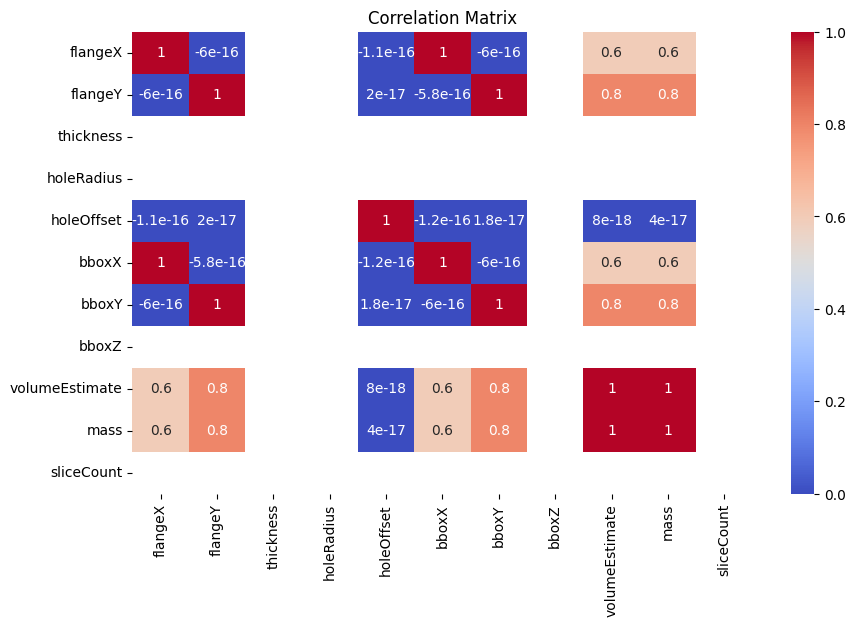

In [4]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

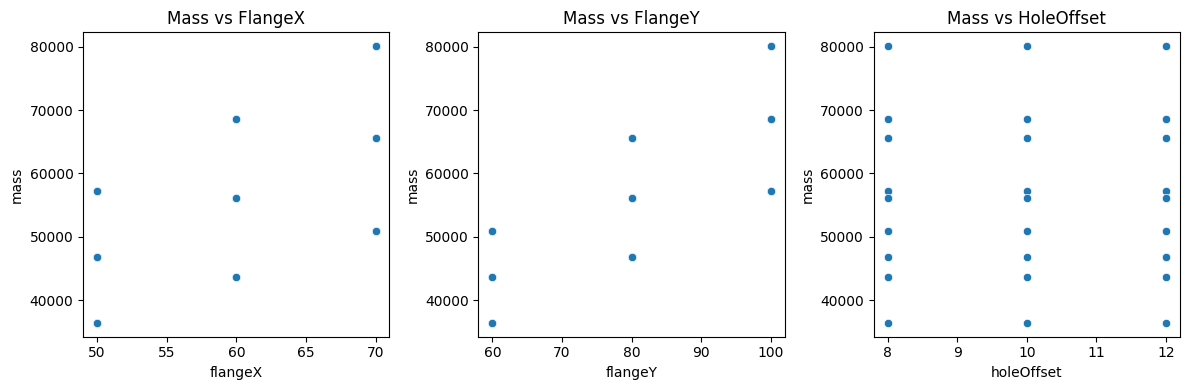

In [5]:
# Visualize mass vs key parameters
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='flangeX', y='mass', data=df)
plt.title('Mass vs FlangeX')

plt.subplot(1, 3, 2)
sns.scatterplot(x='flangeY', y='mass', data=df)
plt.title('Mass vs FlangeY')

plt.subplot(1, 3, 3)
sns.scatterplot(x='holeOffset', y='mass', data=df)
plt.title('Mass vs HoleOffset')

plt.tight_layout()
plt.show()

In [6]:
# Define features and target
X = df[['flangeX', 'flangeY', 'thickness', 'holeRadius', 'holeOffset']]
y = df['mass']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

In [10]:
# Train MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(64,64), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

/Users/ksnaik/miniconda3/envs/practice/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ksnaik/miniconda3/envs/practice/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ksnaik/miniconda3/envs/practice/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ksnaik/miniconda3/envs/practice/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ksnaik/miniconda3/envs/practice/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ksnaik/miniconda3/envs/practice/lib/python3.9/site-packages/sklearn/utils/extmath.py:20

In [8]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"📊 {name}")
    print(f"  MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"  R² : {r2_score(y_true, y_pred):.3f}")
    print()

In [11]:
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("MLP Regressor", y_test, y_pred_mlp)

📊 Random Forest
  MAE: 1558.27
  R² : 0.972

📊 MLP Regressor
  MAE: 5535.29
  R² : 0.635



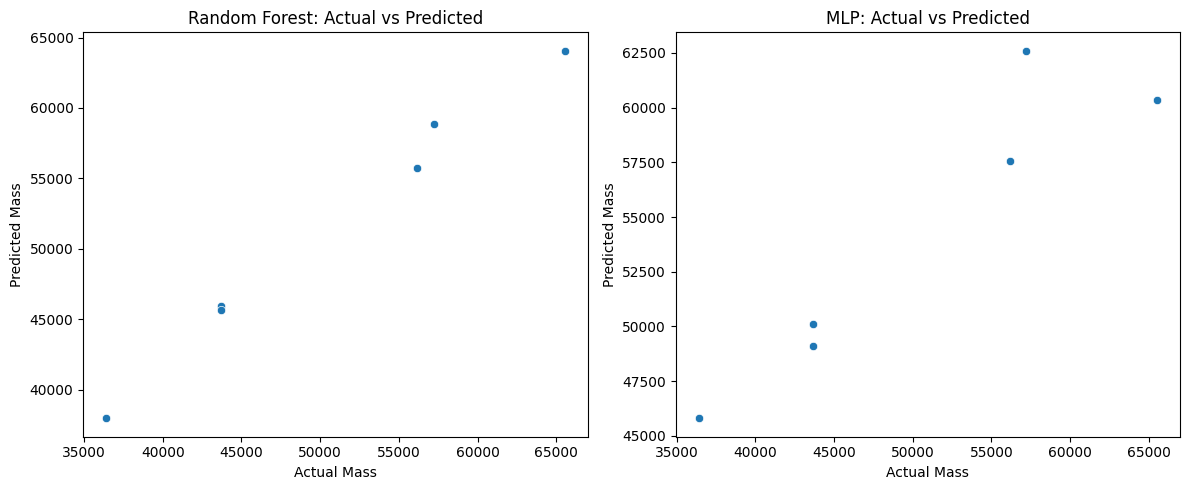

In [12]:
# Plot predictions vs actual
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Mass")
plt.ylabel("Predicted Mass")
plt.title("Random Forest: Actual vs Predicted")

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_mlp)
plt.xlabel("Actual Mass")
plt.ylabel("Predicted Mass")
plt.title("MLP: Actual vs Predicted")

plt.tight_layout()
plt.show()

### This is just a demo, not some real predictions. Under fitting or over fitting is ignored